### Numpy

#### Working with NumPy Arrays
- Getting familiar with arrays and NumPy functions 
    - Creating an array 
    - Reshaping an array 
    - Combining arrays 
    - Testing for conditions 
- Broadcasting, vectorization, and arithmetic operations
- Obtaining the properties of an array 
- Slicing or selecting a subset of data 
- Obtaining descriptive statistics/aggregate measures 
- Matrices 

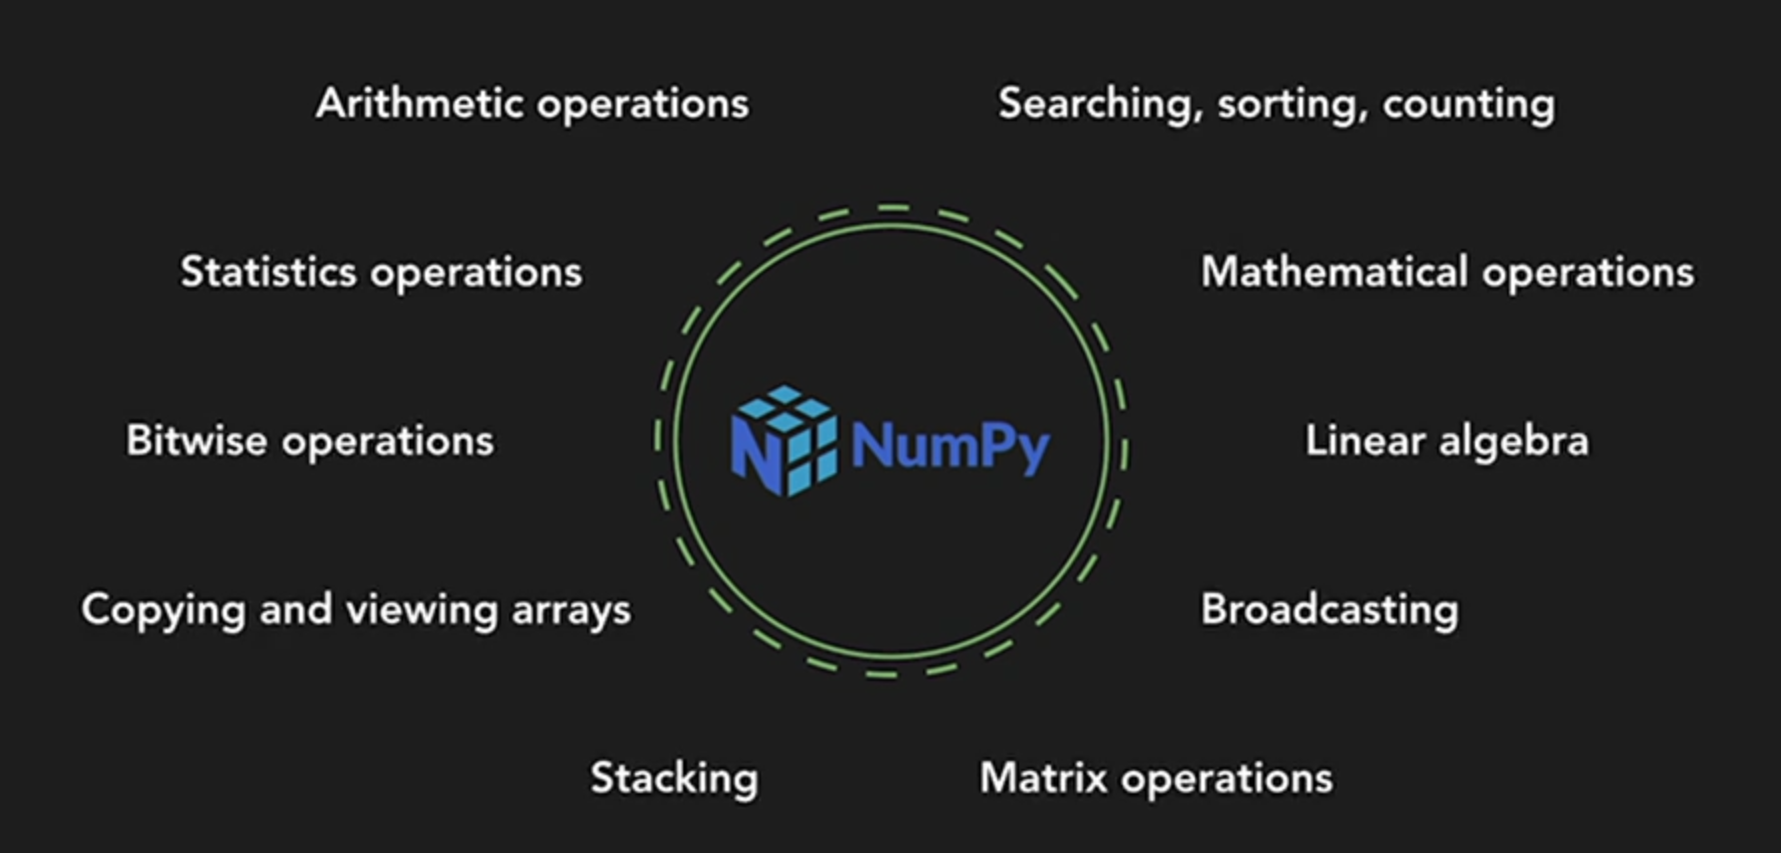

## Working with numerical data

The "data" in *Data Analysis* typically refers to numerical data, e.g., stock prices, sales figures, sensor measurements, sports scores, database tables, etc. The [Numpy](https://numpy.org) library provides specialized data structures, functions, and other tools for numerical computing in Python. Let's work through an example to see why & how to use Numpy for working with numerical data.


> Suppose we want to use climate data like the temperature, rainfall, and humidity to determine if a region is well suited for growing apples. A simple approach for doing this would be to formulate the relationship between the annual yield of apples (tons per hectare) and the climatic conditions like the average temperature (in degrees Fahrenheit), rainfall (in  millimeters) & average relative humidity (in percentage) as a linear equation.
>
> `yield_of_apples = w1 * temperature + w2 * rainfall + w3 * humidity`

We're expressing the yield of apples as a weighted sum of the temperature, rainfall, and humidity. This equation is an approximation since the actual relationship may not necessarily be linear, and there may be other factors involved. But a simple linear model like this often works well in practice.

Based on some statical analysis of historical data, we might come up with reasonable values for the weights `w1`, `w2`, and `w3`. Here's an example set of values:

In [12]:
w1, w2, w3 = 0.3, 0.2, 0.5

Given some climate data for a region, we can now predict the yield of apples. Here is some sample data:

<img src="https://i.imgur.com/TXPBiqv.png" style="width:360px;">

To begin, we can define some variables to record climate data for a region.

In [5]:
kanto_temp = 73
kanto_rainfall = 67
kanto_humidity = 43

In [ ]:
We can now substitute these variables into the linear equation to predict the yield of apples.

In [6]:
kanto_yield_apples = kanto_temp * w1 + kanto_rainfall * w2 + kanto_humidity * w3
kanto_yield_apples

56.8

In [7]:
print("The expected yield of apples in Kanto region is {} tons per hectare.".format(kanto_yield_apples))

The expected yield of apples in Kanto region is 56.8 tons per hectare.


To make it slightly easier to perform the above computation for multiple regions, we can represent the climate data for each region as a vector, i.e., a list of numbers.

In [10]:
kanto = [73, 67, 43]
johto = [91, 88, 64]
hoenn = [87, 134, 58]
sinnoh = [102, 43, 37]
unova = [69, 96, 70]

The three numbers in each vector represent the temperature, rainfall, and humidity data, respectively. 

We can also represent the set of weights used in the formula as a vector.

In [14]:
weights = [w1, w2, w3]

We can now write a function `crop_yield` to calcuate the yield of apples (or any other crop) given the climate data and the respective weights.

In [8]:
def crop_yield(region, weights):
    result = 0
    for x, w in zip(region, weights):
        result += x * w
    return result

In [15]:
crop_yield(kanto, weights)

56.8

In [16]:
crop_yield(johto, weights)

76.9

In [17]:
crop_yield(unova, weights)

74.9

## Going from Python lists to Numpy arrays


The calculation performed by the `crop_yield` (element-wise multiplication of two vectors and taking a sum of the results) is also called the *dot product*. Learn more about dot product here: https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/vector-dot-product-and-vector-length . 

The Numpy library provides a built-in function to compute the dot product of two vectors. However, we must first convert the lists into Numpy arrays.

Let's install the Numpy library using the `pip` package manager.

In [ ]:
!pip install numpy --upgrade --quiet

In [31]:
import numpy as np

UsageError: Cell magic `%%run` not found (But line magic `%run` exists, did you mean that instead?).


In [32]:
# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [35]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

CPU times: total: 125 ms
Wall time: 135 ms


833332333333500000

In [38]:
a1 = np.array(list(range(1000000)))
a2 = np.array(list(range(1000000, 2000000)))



In [39]:
%%time
np.dot(a1, a2)

CPU times: total: 0 ns
Wall time: 2.99 ms


-1942957984

In [45]:
import numpy as np
arr = [[1,2],[2,3],[3,4,5]] 
np.array(arr).dtype


C:\Users\karthik\AppData\Local\Temp\ipykernel_12216\529168407.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(arr).dtype


dtype('O')

In [65]:
np.array([[1,2],[2,3],[3,4,4]]).ndim

C:\Users\karthik\AppData\Local\Temp\ipykernel_12216\221840803.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array([[1,2],[2,3],[3,4,4]]).ndim


1

In [63]:
print("fds")

fds


In [66]:
import urllib.request

urllib.request.urlretrieve(
    'https://gist.github.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv', 
    'climate.txt')

('climate.txt', <http.client.HTTPMessage at 0x2492c476470>)

In [80]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'AdvancePython.ipynb',
 'climate.txt',
 'dfd.csv',
 'newDi',
 'NumpyLec.ipynb',
 'Untitled.ipynb',
 'untitled.py',
 'Untitled1.ipynb']

In [99]:
climate_data = np.genfromtxt('climate.txt',delimiter=',',skip_header=1)   # conver to array data

In [100]:
climate_data

array([[25., 76., 99.],
       [39., 65., 70.],
       [59., 45., 77.],
       ...,
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [79]:
climate_data.dtype

dtype('int32')

In [106]:
#index and slicing
climate_data[-5:]

array([[80., 72., 98.],
       [27., 58., 60.],
       [99., 62., 58.],
       [70., 71., 91.],
       [92., 39., 76.]])

In [109]:
#coloumn wise data
climate_data[0:10,0:2]  # [row,coloumn]  # 10 rows and two columns


array([[25., 76.],
       [39., 65.],
       [59., 45.],
       [84., 63.],
       [66., 50.],
       [41., 94.],
       [91., 57.],
       [49., 96.],
       [67., 20.],
       [85., 31.]])

In [112]:
arr3d=np.arange(27).reshape(3,3,3)
arr3d

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [124]:
arr3d[:,:,0:2]   #  [axis0,axis1,axis2]  # all data in axis 0 and 1 with axis2 coloumn 1,2

array([[[ 0,  1],
        [ 3,  4],
        [ 6,  7]],

       [[ 9, 10],
        [12, 13],
        [15, 16]],

       [[18, 19],
        [21, 22],
        [24, 25]]])

Question 1
Create the following array: ```
array([[[ 1, 2, 3, 4],
[ 5, 6, 7, 8]],
[[ 9, 10, 11, 12],
[13, 14, 15, 16]],
[[17, 18, 19, 20],
[21, 22, 23, 24]]])```
Slice the preceding array to obtain the following:
• Elements in the third subarray (17,18,19,20,21,22,23,24)
• Last element (24)
• Elements in the second column (2,6,10,14,18,22)
• Elements along the diagonal (1,10,19,24)

In [125]:
arr=np.arange(1,25).reshape(3,2,4)
arr

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 10, 11, 12],
        [13, 14, 15, 16]],

       [[17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [126]:
arr[2]

array([[17, 18, 19, 20],
       [21, 22, 23, 24]])

In [130]:
arr[0,0,0],arr[1,0,1],arr[2,0,2],arr[2,1,3]

(1, 10, 19, 24)

In [131]:
#Modifying arrays  #ndarray is mutable
arr[0,0,0],arr[1,0,1],arr[2,0,2],arr[2,1,3]=10,20,30,40

In [132]:
arr

array([[[10,  2,  3,  4],
        [ 5,  6,  7,  8]],

       [[ 9, 20, 11, 12],
        [13, 14, 15, 16]],

       [[17, 18, 30, 20],
        [21, 22, 23, 40]]])

In [133]:
arr[0,0,0],arr[1,0,1],arr[2,0,2],arr[2,1,3]

(10, 20, 30, 40)

In [136]:
arr.shape

(3, 2, 4)

In [135]:
arr[2,1,4]=45  # ndarray is fixed memory like c 

IndexError: index 4 is out of bounds for axis 2 with size 4

Combining arrays
There are three methods for combining arrays: appending, concatenation, and stacking.
1. Appending involves joining one array at the end of another array.
The np.append function is used to append two arrays.

In [142]:
arr1=np.array([[[1,3],[2,4]]])
arr2=np.array([[5,6],[9,5]])
arr3=np.append(arr1,arr2)  # 1D array
arr3

array([1, 3, 2, 4, 5, 6, 9, 5])

In [146]:
x=np.array([[1,2],[3,4]])
y=np.array([[6,7,8],[9,10,11]])
np.append(x,y).reshape(2,-1)

array([[ 1,  2,  3,  4,  6],
       [ 7,  8,  9, 10, 11]])

In [152]:
#concatenation#concatenation
arr1=np.array([[1,3],[2,4]])   # both arr1 and arr2 dimension  should match
arr2=np.array([[5,6],[9,5]])
arr3=np.concatenate((arr1,arr2),axis=1) # axis=0 row based # axis=1 column based concatenation
arr3

array([[1, 3, 5, 6],
       [2, 4, 9, 5]])

In [ ]:
Stacking: 
Stacking can be of two types, vertical and horizontal

In [ ]:
Vertical stacking
As the name indicates, vertical stacking stacks arrays one below the other. 
The number of elements in each subarray of the arrays being stacked vertically 
must be the same for vertical stacking towork. 
The np.vstack function is used for vertical stacking.

In [155]:
#vertical stack  # row
arr1=np.array([[1,3,6],[2,4,7]])   # both arr1 and arr2 dimension  and element should match
arr2=np.array([[5,6,7],[9,5,5]])
arr3=np.vstack((arr1,arr2)) # vertical stack combining two arrays in vertical manner
arr3

array([[1, 3, 6],
       [2, 4, 7],
       [5, 6, 7],
       [9, 5, 5]])

In [156]:
#Horizontal stack #coloumn
arr1=np.array([[1,3,6],[2,4,7]])   #  # both arr1 and arr2 dimension  should match
arr2=np.array([[5,6,7,5],[9,5,5,8]])
arr3=np.hstack((arr1,arr2)) #horizontal stack
arr3

array([[1, 3, 6, 5, 6, 7, 5],
       [2, 4, 7, 9, 5, 5, 8]])

In [180]:
import numpy as np
heights_arr = np.array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175, 178, 183, 193, 178, 173, 174, 183, 183, 180, 168, 180, 170, 178, 182, 180, 183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177, 185, 188, 188, 182, 185, 191])
ages_arr = np.array([57, 61, 57, 57, 58, 57, 61, 54, 68, 51, 49, 64, 50, 48, 65, 52, 56, 46, 54, 49, 51, 47, 55, 55, 54, 42, 51, 56, 55, 51, 54, 51, 60, 62, 43, 55, 56, 61, 52, 69, 64, 46, 54, 47, 70])
#heights is in  cm
heights_arr=heights_arr.reshape(-1,1) # (45,1)
ages_arr=ages_arr.reshape(-1,1)
heights_ages_arr=np.hstack((heights_arr,ages_arr))
heights_ages_arr[:,0]* 0.01 # convert cm to meter in height



array([1.89, 1.7 , 1.89, 1.63, 1.83, 1.71, 1.85, 1.68, 1.73, 1.83, 1.73,
       1.73, 1.75, 1.78, 1.83, 1.93, 1.78, 1.73, 1.74, 1.83, 1.83, 1.8 ,
       1.68, 1.8 , 1.7 , 1.78, 1.82, 1.8 , 1.83, 1.78, 1.82, 1.88, 1.75,
       1.79, 1.83, 1.93, 1.82, 1.83, 1.77, 1.85, 1.88, 1.88, 1.82, 1.85,
       1.91])

In [181]:
heights_ages_arr

array([[189,  57],
       [170,  61],
       [189,  57],
       [163,  57],
       [183,  58],
       [171,  57],
       [185,  61],
       [168,  54],
       [173,  68],
       [183,  51],
       [173,  49],
       [173,  64],
       [175,  50],
       [178,  48],
       [183,  65],
       [193,  52],
       [178,  56],
       [173,  46],
       [174,  54],
       [183,  49],
       [183,  51],
       [180,  47],
       [168,  55],
       [180,  55],
       [170,  54],
       [178,  42],
       [182,  51],
       [180,  56],
       [183,  55],
       [178,  51],
       [182,  54],
       [188,  51],
       [175,  60],
       [179,  62],
       [183,  43],
       [193,  55],
       [182,  56],
       [183,  61],
       [177,  52],
       [185,  69],
       [188,  64],
       [188,  46],
       [182,  54],
       [185,  47],
       [191,  70]])

In [170]:
heights_arr

array([189, 170, 189, 163, 183, 171, 185, 168, 173, 183, 173, 173, 175,
       178, 183, 193, 178, 173, 174, 183, 183, 180, 168, 180, 170, 178,
       182, 180, 183, 178, 182, 188, 175, 179, 183, 193, 182, 183, 177,
       185, 188, 188, 182, 185, 191])

In [ ]:
#---------Batch2-----------------


In [192]:
arr = [[1, 2], [2, 3], [3.,4, 4,]] 
print(np.array(arr).dtype)
type(arr[1])
arr

object


C:\Users\karthik\AppData\Local\Temp\ipykernel_12216\519121099.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(np.array(arr).dtype)


[[1, 2], [2, 3], [3.0, 4, 4]]

In [194]:
n_arr1=np.arange(1,100000).reshape()
n_arr2=np.arange(100000,200000)


In [195]:
arr1=range(1,100000)
arr2=range(100000,200000)


In [1]:
%%time
np.dot(n_arr1,n_arr2)

NameError: name 'np' is not defined

In [198]:
# Python lists
arr1 = list(range(1000000))
arr2 = list(range(1000000, 2000000))

# Numpy arrays
arr1_np = np.array(arr1)
arr2_np = np.array(arr2)

In [199]:
%%time
result = 0
for x1, x2 in zip(arr1, arr2):
    result += x1*x2
result

CPU times: total: 109 ms
Wall time: 111 ms


833332333333500000

In [202]:
%%time
np.dot(arr1_np,arr1_np)

CPU times: total: 0 ns
Wall time: 2.99 ms


584144992

In [203]:
%%time
arr1_np*arr1_np

CPU times: total: 0 ns
Wall time: 2.96 ms


array([         0,          1,          4, ..., -733379959, -731379964,
       -729379967])

In [204]:
%%time
arr1*arr2

TypeError: can't multiply sequence by non-int of type 'list'

In [205]:

np.array([1,2,3])*np.array([3,4,1])

array([3, 8, 3])

In [211]:
import urllib.request
urllib.request.urlretrieve(r"https://gist.githubusercontent.com/BirajCoder/a4ffcb76fd6fb221d76ac2ee2b8584e9/raw/4054f90adfd361b7aa4255e99c2e874664094cea/climate.csv","climate.txt")

('climate.txt', <http.client.HTTPMessage at 0x2492c4e7a90>)

In [210]:
import os
os.getcwd()
os.listdir()

['.ipynb_checkpoints',
 'AdvancePython.ipynb',
 'climate.txt',
 'dfd.csv',
 'newDi',
 'NumpyLec.ipynb',
 'Untitled.ipynb',
 'untitled.py',
 'Untitled1.ipynb']

In [90]:
#text file to numpy array conversion function
climate_data=np.genfromtxt("climate.txt",delimiter=",",skip_header=1,dtype='i')


In [91]:
climate_data

array([[25, 76, 99],
       [39, 65, 70],
       [59, 45, 77],
       ...,
       [99, 62, 58],
       [70, 71, 91],
       [92, 39, 76]], dtype=int32)

In [223]:
climate_data.shape

(10000, 3)

In [18]:
climate_data@np.array([0.3, 0.2, 0.5])

array([72.2, 59.7, 65.2, ..., 71.1, 80.7, 73.4])

In [214]:
type(climate_data)

numpy.ndarray

In [227]:
climate_data.dtype

dtype('int32')

In [228]:
#slice
climate_data[0] # 1st row

array([25, 76, 99], dtype=int32)

In [230]:
c #last row  [row:coloumn]

array([[80, 72, 98],
       [27, 58, 60],
       [99, 62, 58],
       [70, 71, 91],
       [92, 39, 76]], dtype=int32)

In [232]:
climate_data[:,0:2] # all rows of temperature and rainfall

array([[25, 76],
       [39, 65],
       [59, 45],
       ...,
       [99, 62],
       [70, 71],
       [92, 39]], dtype=int32)

In [233]:
arr3d=np.arange(27).reshape(3,3,3)
arr3d

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [236]:
#slicing arr3d
arr3d[2]

array([[18, 19, 20],
       [21, 22, 23],
       [24, 25, 26]])

In [243]:
arr3d[:,:,2]   #(axis0,axis1,axis2)

array([[ 2,  5,  8],
       [11, 14, 17],
       [20, 23, 26]])

In [244]:
#modify the value in ndarray # mutable 
arr3d[2,2,2]=45

In [245]:
arr3d

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 45]]])

In [246]:
arr3d[2,2,3]=56

IndexError: index 3 is out of bounds for axis 2 with size 3

In [ ]:
arr3d

In [248]:
import collections
N = int(input())
d = collections.OrderedDict()
for i in range(N):
    w = input()
    if w in d:
        d[w] +=1
    else:
        d[w] = 1
print(len(d));
for k in d.items():
    print(k,end = " ");


 4
 abc
 dff
 abc
 abc


2
('abc', 3) ('dff', 1) 

### Combining arrays
- There are three methods for combining arrays: appending, concatenation, and stacking.
- 1. Appending involves joining one array at the end of another array.
- The np.append function is used to append two arrays.

In [262]:
#appending
x=np.array([[1,2,5],[3,4,3]])   # both x and y dimension should match
y=np.array([[6,7,8],[9,10,11]])
z=np.append(x,y,axis=1)
z # based on axis 1D,row based append/ coloumn based append

array([[ 1,  2,  5,  6,  7,  8],
       [ 3,  4,  3,  9, 10, 11]])

In [ ]:
#concatenation
Concatenation involves joining arrays along an axis (either vertical or horizontal). 
The np.concatenate function concatenates arrays.


In [269]:
x=np.array([[1,2],[3,4]])
y=np.array([[6,7],[9,10]])
z=np.array([[2,3],[7,84]])
np.concatenate((x,y,z),axis=1)  #default axis=0

array([[ 1,  2,  6,  7,  2,  3],
       [ 3,  4,  9, 10,  7, 84]])

In [271]:
c1=climate_data[:,0]
c3=climate_data[:,2]

In [272]:
c1,c3

(array([25, 39, 59, ..., 99, 70, 92], dtype=int32),
 array([99, 70, 77, ..., 58, 91, 76], dtype=int32))

In [285]:
c1=c1.reshape(-1,1)


In [286]:
c3=c3.reshape(-1,1)

In [289]:
np.concatenate((c1,c3),axis=1) #

array([[25, 99],
       [39, 70],
       [59, 77],
       ...,
       [99, 58],
       [70, 91],
       [92, 76]], dtype=int32)

In [287]:
c1,c3

(array([[25],
        [39],
        [59],
        ...,
        [99],
        [70],
        [92]], dtype=int32),
 array([[99],
        [70],
        [77],
        ...,
        [58],
        [91],
        [76]], dtype=int32))

In [14]:
climate_data

NameError: name 'climate_data' is not defined

### Stacking: 
- Stacking can be of two types, vertical or horizontal, as explained in the following

In [293]:
x=np.array([[1,2],[3,4]])
y=np.array([[6,7],[8,9],[10,11]])
np.vstack((x,y))

array([[ 1,  2],
       [ 3,  4],
       [ 6,  7],
       [ 8,  9],
       [10, 11]])

In [296]:
x=np.array([[1,2],[3,4]])
y=np.array([[6,7,8,9],[9,10,11,8]])
np.hstack((x,y))

array([[ 1,  2,  6,  7,  8,  9],
       [ 3,  4,  9, 10, 11,  8]])

In [ ]:
Testing for contidtion
logical operator &,|,~
np.any()
np.all()
np.where()

In [68]:
import os
os.listdir()
os.path.abspath("corp_yeid_data.csv")

'C:\\Users\\karthik\\AdvancePython\\corp_yeid_data.csv'

In [302]:
np.all(c1<=50)

False

In [303]:
np.any(c1<=50)

True

In [305]:
c1.min()

20

In [314]:
c1[np.where(c1<=50)]

array([25, 39, 41, ..., 23, 49, 27], dtype=int32)

In [312]:
np.where(c1==25)

(array([   0,   95,  232,  261,  269,  348,  595,  688,  713,  740,  751,
         839, 1009, 1122, 1212, 1268, 1377, 1412, 1496, 1546, 1549, 1585,
        1646, 1946, 2019, 2094, 2321, 2340, 2343, 2375, 2428, 2445, 2493,
        2603, 2793, 2866, 3121, 3348, 3386, 3540, 3734, 3760, 3763, 3878,
        3990, 4033, 4059, 4089, 4184, 4599, 4693, 4720, 4947, 5292, 5325,
        5412, 5609, 5614, 5792, 5796, 5870, 5910, 6008, 6050, 6071, 6181,
        6187, 6283, 6376, 6450, 6581, 6597, 6757, 6980, 7010, 7191, 7356,
        7365, 7530, 7627, 7710, 7870, 7978, 8021, 8148, 8451, 8647, 8654,
        8877, 8977, 8983, 9035, 9043, 9170, 9206, 9420, 9440, 9481, 9634,
        9695, 9934], dtype=int64),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   

## Testing for conditions

NumPy uses logical operators (&,|,~), and functions like np.any, np.all, and np.where
to check for conditions. The elements in the array (or their indexes) that satisfy the
condition are returned.


In [70]:
import urllib.request
urllib.request.urlretrieve('https://sololearn.com/uploads/files/president_heights_party.csv',"president_heights_party.csv")


('president_heights_party.csv', <http.client.HTTPMessage at 0x18ad3cf8b20>)

In [91]:
president_age_heights=np.genfromtxt("president_heights_party.csv",delimiter=',',skip_header=1)[:,2:4]

In [1]:
president_age_heights

SyntaxError: invalid syntax (1315439753.py, line 1)

In [111]:
np.all(president_age_heights[:,0]>=0) # check for all the value in array none zero

True

In [94]:
president_age_heights.any()# check for any the value in array none zero

True

In [107]:
np.where((president_age_heights[:,1])<185) # return index array of whose hight is above 185 cm

(array([ 1,  3,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 36, 37, 38, 42],
       dtype=int64),)

In [103]:
president_age_heights[2]

array([ 57., 189.])

In [115]:
president_age_heights[president_age_heights[:,1]>185]

array([[  0., 189.],
       [ 57., 189.],
       [ 52., 193.],
       [ 51., 188.],
       [ 55., 193.],
       [ 64., 188.],
       [ 46., 188.],
       [ 70., 191.]])

###  np.any, np.all, and np.where

In [114]:
import numpy as np
x=np.linspace(1,50,10)
x

array([ 1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ])

In [112]:
#The np.all  function returns the value “True” only if the condition holds for all the items of the array
np.all(x>0)


True

In [113]:
# The np.any function returns the value “True” if any of the items satisfy the condition.
np.any(x>20)

True

In [9]:
#The np.where function returns the index of the values in the array satisfying a given condition. 
np.where(x<10) #returns the index of elements that are less than 10

(array([0, 1], dtype=int64),)

The np.where function is also useful for selectively retrieving or filtering values in an array.

In [144]:
x[np.where(x<10)]

array([1.        , 6.44444444])

### Checking for more than one condition:
NumPy uses the following Boolean operators to combine conditions:
- & operator (equivalent to and operator in Python): Returns True when all conditions are satisfied
- |operator (equivalent to or operator in Python): Returns True when any one condition, from a given set of conditions, is satisfied.
- ~ operator (equivalent to not operator in Python) for negating a condition.


In [142]:
import numpy as np
x=np.linspace(1,50,10)  #  1 t0 50 equally spaced 10 values
x

array([ 1.        ,  6.44444444, 11.88888889, 17.33333333, 22.77777778,
       28.22222222, 33.66666667, 39.11111111, 44.55555556, 50.        ])

In [143]:
(x>10) & (x<50)

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False])

In [117]:
# & operator 
x[(x>10) & (x<50)]   #Returns all items that have a value greater than 10 and less than 50

array([11.88888889, 17.33333333, 22.77777778, 28.22222222, 33.66666667,
       39.11111111, 44.55555556])

In [12]:
# |operator
x[(x>10) | (x<5)] #Returns all items that have a value greater than 10 or less than 5

array([ 1.        , 11.88888889, 17.33333333, 22.77777778, 28.22222222,
       33.66666667, 39.11111111, 44.55555556, 50.        ])

In [13]:
# ~ operator
x[~(x<8)] #Returns all items greater than 8

array([11.88888889, 17.33333333, 22.77777778, 28.22222222, 33.66666667,
       39.11111111, 44.55555556, 50.        ])

In [152]:
np.array([1,2,3])*5   #np.array([3,2])  # element wise multiplication

array([ 5, 10, 15])

### Broadcasting, vectorization, and arithmetic operations

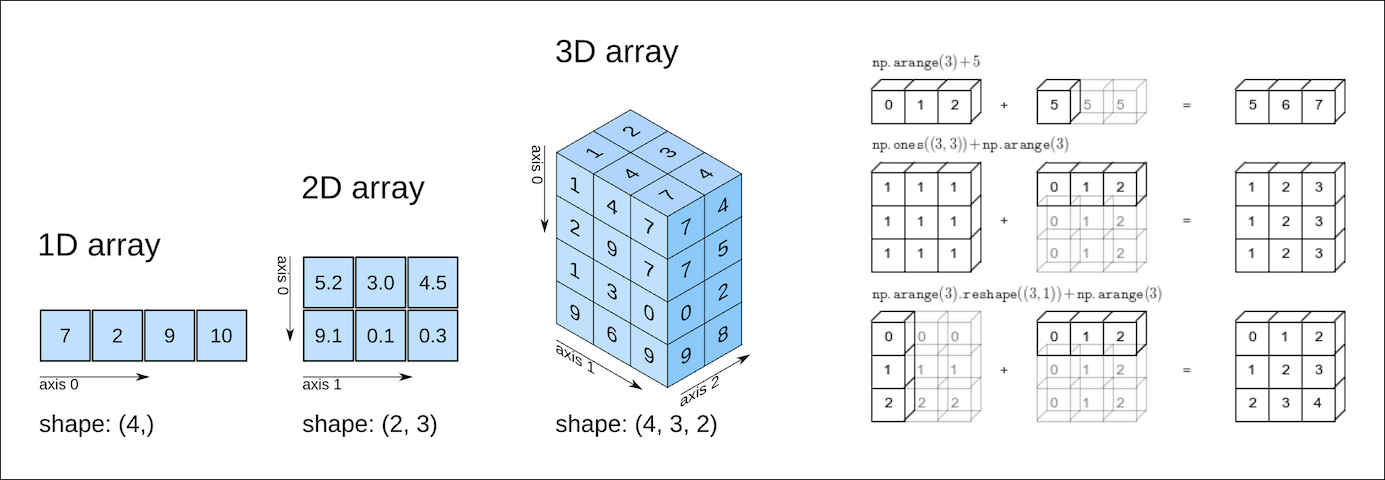

### Broadcasting
- When we say that two arrays can be broadcast together, this means that their dimensions
- are compatible for performing arithmetic operations on them. Arrays can be combined
- using arithmetic operators as long as the rules of broadcasting are followed, which are
- explained in the following.
- 1. Both the arrays have the same dimensions.
- 2. One of the arrays is a one-element array # 0D  [3]
- 3. An array and a scalar (a single value) are combined. 3 



In [154]:
#1. Both the arrays have the same dimensions.
x=np.arange(0,12).reshape(2,6)
print(x)
y=np.arange(5,17).reshape(2,6)
print(y)
x*y


[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[[ 5  6  7  8  9 10]
 [11 12 13 14 15 16]]


array([[  0,   6,  14,  24,  36,  50],
       [ 66,  84, 104, 126, 150, 176]])

In [155]:
#2. One of the arrays is a one-element array.
x=np.arange(0,12).reshape(2,6)
print(x)
y=np.array([1,2,2,3,1,2])
print(y)
x-y

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[1 2 2 3 1 2]


array([[-1, -1,  0,  0,  3,  3],
       [ 5,  5,  6,  6,  9,  9]])

In [131]:
#3 An array and a scalar (a single value) are combined.
#In this example, the variable y is used as a scalar value in the operation.

x=np.arange(0,12).reshape(2,6)
print(x)
y=2 # Y is scalar value 2
print(y)
x*y

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
2


array([[ 0,  2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20, 22]])

In [ ]:
We can add, subtract, multiply, and divide arrays using either the arithmetic operators
(+/-/* and /), or the functions (np.add, np.subtract, np.multiply, and np.divide)

In [130]:
np.add(x,y) #Or x+y   uuniversal function  # ufunction
np.multiply(x,y) #x*y
np.divide(x,y) #x/y

array([[ 2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13]])

In [157]:
import numpy as np
list1 = [10, 20, 30, 40]
list2 = [80, 70, 60, 50]
list3 = np.multiply(list1, list2)
print(list3)

[ 800 1400 1800 2000]


In [159]:
import numpy as np
def myMultiply(a, b):      # define my own function
    return a*b
myMultiply = np.frompyfunc(myMultiply, 2, 1)  # assign converted normal function to universal function
print(myMultiply([0, 1, 2, 3, 4 ], [5, 6, 7, 8, 9]))

[0 6 14 24 36]


In [162]:

print(x)
print(y)
print(myMultiply(x,y))

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
[1 2 2 3 1 2]
[[0 2 4 9 4 10]
 [6 14 16 27 10 22]]


In [163]:
x*y

array([[ 0,  2,  4,  9,  4, 10],
       [ 6, 14, 16, 27, 10, 22]])

In [ ]:
Similarly, you can use np.subtract (or the – operator) for subtraction, np.multiply (or the
* operator) for multiplication, and np.divide (or the / operator) for division.
Further reading: See more on array broadcasting: https://numpy.org/doc/stable/
user/basics.broadcasting.html

### Vectorization
Using the principle of vectorization, you can also conveniently apply arithmetic
operators on each object in the array, instead of iterating through the elements, which is
what you would do for applying operations to items in a container like a list.


In [24]:
x=np.array([2,4,6,8])
x/2 #divides each element by 2

array([1., 2., 3., 4.])

In [ ]:
Dot product
We can obtain the dot product of two arrays, which is different from multiplying two
arrays. Multiplying two arrays gives an element-wise product, while a dot product of two
arrays computes the inner product of the elements.
If we take two arrays,
|PQ|
|RS|
and
|UV|
|WX|
The dot product is given by
|PQ| . |UV| = |P*U+Q*V P*V+Q*X|
|R S| |WX| |R*U+S*W R*V+S*X|
Multiplying the arrays gives the following result:
|PQ| * |UV| = |P*U Q*V|
|R S| |WX| |R*WS*X|
As discussed earlier, arrays can be multiplied using the multiplication operator (*) or the
np.multiply function.
The NumPy function for obtaining the dot product is np.dot.

In [132]:
#The NumPy function for obtaining the dot product is np.dot.
print(x)
print(y)
np.dot(x,y)  # @ or np.dot() both  doing matrix multiplication

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
2


array([[ 0,  2,  4,  6,  8, 10],
       [12, 14, 16, 18, 20, 22]])

In [4]:
import numpy as np

A = np.array([[2,1,0,3],[1,0,3,2],[6,1,2,3]])
B = np.array([[1,4],[2,0],[7,1],[3,4]])
print(A)
print(B)
C =np.dot(A,B)       #np.dot(A,B)  # matrix multiplication @
print(C)

[[2 1 0 3]
 [1 0 3 2]
 [6 1 2 3]]
[[1 4]
 [2 0]
 [7 1]
 [3 4]]
[[13 20]
 [28 15]
 [31 38]]


In [6]:
mat=np.mat([[2,4],[5,7]])
mat

matrix([[2, 4],
        [5, 7]])

In [7]:
mat.T #Transpose of matrix

matrix([[2, 5],
        [4, 7]])

In [9]:
mat.diagonal()

matrix([[2, 7]])

In [ ]:
mat.

In [141]:
# Import numpy
import numpy as np
# Create matrix using NumPy
mat=np.mat([[2,4],[5,7]])
print("Matrix:\n",mat)
# Calculate determinant
print("Determinant:",np.linalg.det(mat))

Matrix:
 [[2 4]
 [5 7]]
Determinant: -5.999999999999998


### Obtaining the properties of an array
- Array properties like their size, dimensions, number of elements, and memory usage can be found out using attributes.

In [11]:
x=np.arange(0,10).reshape(5,2)
#The size property gives the number of elements in the array.
print(x)

x.size

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


10

In [27]:
#The ndim property gives the number of dimensions.

x.ndim

2

In [28]:
#The memory (total number of bytes) occupied by an array can be calculated using the nbytes attribute.

x.nbytes

40

In [29]:
#The data type of elements in this array can be calculated using the dtype attribute.

x.dtype

dtype('int32')

In [21]:
import numpy as np
myArr = np. array([0.99, 1.99, 2.99, 3.99])
print(myArr.dtype)
myArr.astype("i")   # type conversion


float64


array([0, 1, 2, 3], dtype=int32)

In [ ]:
Note the difference between the dtype and the type of an array. The type function gives
the type of the container object (in this case, the type is ndarray), and dtype, which is an
attribute, gives the type of individual items in the array.
Further reading: Learn more about the list of data types supported by NumPy:
https://numpy.org/devdocs/user/basics.types.html

### Transposing an array
- The transpose of an array is its mirror image.
- There are two methods for transposing an array:
-    1. np.transpose method.
-     2.the T attribute to obtain the transpose np.T

In [23]:
x=np.arange(0,10).reshape(5,2)
print(x)
#np.transpose(x) #
x.T

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


array([[0, 2, 4, 6, 8],
       [1, 3, 5, 7, 9]])

### NumPy ufuncs
- The “ufuncs” means 'Universal Functions', which actually are NumPy functions. “ufuncs” are used to realize vectorization to run NumPy program fast. We can regard a “ufunc” as a NumPy built-in function.
- ufuncs are used to implement vectorization in NumPy which is way faster than iterating over elements.
- They also provide broadcasting and additional methods like reduce, accumulate etc. that are very helpful for computation.
- ufuncs also take additional arguments, like:
- where boolean array or condition defining where the operations should take place.
- dtype defining the return type of elements.
- out output array where the return value should be copied.

In [72]:
import numpy as np
list1 = [10, 20, 30, 460]
list2 = [80, 70, 60, 50]
list3 = np.add(list1, list2)
print(list3)

[ 90  90  90 510]


In [73]:
type(np.add)
type(np.multiply)


numpy.ufunc

In [74]:
type(np.reshape)

function

In [40]:
type(np.divide)

numpy.ufunc

In [36]:
type(np.reshape)

function

#### Check NumPy ufunc
- We can check a function if it is a NumPy ufunc. type(np. function_name)
- If the type() returns <class 'numpy. ufunc'>, the function is proved to be a ufunc.



In [75]:
import numpy as np
print(type(np.add) )
print(type(np.subtract) )
print(type(np.multiply) )
print(type(np.divide) )

<class 'numpy.ufunc'>
<class 'numpy.ufunc'>
<class 'numpy.ufunc'>
<class 'numpy.ufunc'>


### Create My Own ufunc
- The steps to create my own ufunc are as follows:
    - 1. Define a normal and my own Python function.
    - 2. Add this function to the NumPy ufunc library. The syntax is:
- frompyfunc(myFunction, number1, number2)
- “number1” means the number of input arrays.
- “number2” means the number of output array. 

In [79]:
import numpy as np
def myMultiply(a, b):      # define my own function
    return a*b-1
myMultiply = np.frompyfunc(myMultiply, 2, 1) #adds myMultiply() to the NumPy ufunc library. Two input arrays, One output array.
print(myMultiply([0, 1, 2, 3, 4 ], [5, 6, 7, 8, 9]))

[-1 5 13 23 35]


In [77]:
type(myMultiply)

numpy.ufunc

In [80]:
myMultiply([1,2,3],[3,4,5])

array([2, 7, 14], dtype=object)

In [82]:
import math
math.pow([1,2,3],3)

TypeError: must be real number, not list

### power(), mod(), remainder()
- The power() function rises the value of array1 to the power of the values of array2.
- The mod() and remainder() get the remainder from the values of array1 being divided by the values of array2. 

In [83]:
import numpy as np
arr1 = np. array([10,10,10])
arr2 = np. array([2, 3, 4])
p = np.power(arr1, arr2)
m = np.mod(arr1, arr2)
r = np.remainder(arr1, arr2)
print(p)
print(m)
print(r)

[  100  1000 10000]
[0 1 2]
[0 1 2]


### trunc() & fix()
- “trunk() & fix()” removes the decimal and return a number nearest the zero. The syntaxes are as follows:
- trunk([ floating_numbers ])
- fix([ floating_numbers ])



In [85]:
import numpy as np
t = np.trunc([-2.71828, 2.71828,54.4565656]) #remove the decimal and returns a new floating number nearest zero.
f = np.fix([-2.71828, 2.71828]) 
print(t)
print(f)

[-2.  2. 54.]
[-2.  2.]


### around(), ceil(), floor()
- About NumPy arithmetic functions around(), ceil(), and floor():
- around() returns a value being rounded off .
- ceil() returns a least integer greater than itself.
- floor() returns a largest integer less than itself.



In [86]:
import numpy as np
a = np.around([7.555,45.678,566.3454], 2)    # “2” means two decimal places
c = np.ceil([7.555,45.4545,776.545])
f = np.floor([7.555,54.5656,54.566])
print(a)
print(c)
print(f)

[  7.56  45.68 566.35]
[  8.  46. 777.]
[ 7. 54. 54.]


### log2(), log10(), log()
- About NumPy arithmetic functions log2(), log10(), and log():
- log2(array)      # perform log in base 2
- log10(array)      # perform log in base 10
- log(array)      # perform log in base e



In [53]:
type(np.floor)

numpy.ufunc

In [54]:
import numpy as np
arr = np. arange(1,4)      # the range is from 1 to 3
print(np.log2(arr) )
print(np.log10(arr) )
print(np.log(arr) )

[0.        1.        1.5849625]
[0.         0.30103    0.47712125]
[0.         0.69314718 1.09861229]


### Log in Any Base
- If the log base is any value, we need to use “from math import log” at the beginning of the code. The syntax is:
- from math import log
- math. log(number, base)

In [55]:
from math import log
import numpy as np
print( log(16, 4) )      # the base is 4 

2.0


### Functions in Numpy

### Sum of Arrays
- We can get the sum of all element values in multiple arrays.
- sum( [array1, array2, array3] )


In [87]:

import numpy as np
a1 = np. array([10, 10, 10])
a2 = np. array([20, 20, 20])
a3 = np. array([30, 30, 30])
myArr = np.sum((a1, a2, a3))
print(myArr)

180


### Sum & Axis=0
- The parameter “axis=0” can make NumPy vertically sum up the element values in multiple arrays.


For more Univerasl function in numpy: https://numpy.org/doc/stable/reference/ufuncs.html

In [88]:
import numpy as np
a1 = np. array([1, 2, 3])
a2 = np. array([4, 5, 6])
myArr = np.sum([a1, a2], axis=0) #vertically sums up the element values in two arrays because of “axis=0”.
print(myArr)

[5 7 9]


In [92]:
climate_data

array([[25, 76, 99],
       [39, 65, 70],
       [59, 45, 77],
       ...,
       [99, 62, 58],
       [70, 71, 91],
       [92, 39, 76]], dtype=int32)

In [98]:
np.sum(climate_data[:,1:],axis=0)

array([601743, 601066], dtype=int32)

### Sum & Axis=1
- The parameter “axis=1” can make NumPy horizontally sum up the element values in multiple arrays.


In [61]:
import numpy as np
a1 = np. array([1, 2, 3])
a2 = np. array([4, 5, 6])
myArr = np.sum([a1, a2], axis=1) #horizontally sums up the element values in two arrays because of “axis=1
print(myArr)

[ 6 15]


In [62]:
type(np.sum)


function

In [ ]:
1.read climate.txt
2.Load into nd arry climate_data using
 #climate_data=np.genfromtxt("climate_data.txt",delimiter=',',skip_header=1)
3.create weight vector:  #  weight=np.array([.3,.5,.2])
4.product multiply using # crop_yeid=climate_data@weight # np.dot(climate_data,weight)
5.concatenate climate_data and crop_yied  ( add crop_yeid as 4th column)
#crop_yeid_data=np.concatenate(climate_data,crop_yeid.reshape(-1,1),axis=1)
6.save the file as crop_yeid_data.csv using 
#crop_yeid_data=np.savetxt("file_name",nd_arr_obj,delimiter=',',header='temperature,rainfall,humidity,
#                                                                                            corp_yeid')
7.apply trunc() on 4th coloumn (corp_yeid_data.csv) 

### Cumulative Sum
- “Cumulative Sum” is a special addition, it operates like this:
- (1)  (1+2)  (1+2+3)  (1+2+3+4)  (1+2+3+4+5)……
- The syntax of cumulative sum is:
- cumsum(array)


In [ ]:
import numpy as np
myArr = np. array([10, 20, 30, 40])
arr = np.cumsum(myArr)
print(arr)

[ 10  30  60 100]


In [ ]:
np.cumsum(climate_data[:,0])

array([    25,     64,    123, ..., 598252, 598322, 598414], dtype=int32)

### Difference of Array
- The syntax to get the difference of an array is:
- diff(myArr)
- The calculating rule is: “nextElement – previousElement”
- E. g. Given an array [1, 3, 8], we can get the difference in this way:
- 3-1=2,  8-3=5, the final result is [ 2  5 ].


In [4]:
import numpy as np
myArr = np. array([2, 5, 6, 8])
arr = np.diff(myArr)
print(arr)

[3 1 2]


In [102]:
np.diff(climate_data[:,0])

array([ 14,  20,  25, ...,  72, -29,  22], dtype=int32)

### Once More Difference
- The syntax to repeatedly to get the difference is:
- diff(myArr, n = number)
- The parameter “number” is the number of times to repeat.
- E. g. Given an array [1, 3, 8], n=2. we get difference in this way:
- 3-1=2,  8-3=5, returns [2  5].   Then, 5-2=3, the final result is [ 3 ]


In [105]:
import numpy as np
myArr = np. array([2, 5, 6, 8])
arr = np.diff(myArr, n=3)
print(arr)

[3]


In [ ]:
“diff(myArr, n=2) ” returns the differences of myArr two times.
The calculating process is: 5-2=3,  6-5=1,  8-6=2, returns [3 1 2].
Then, 1-3=-2,  2-1=1.   The result is [ -2 1]. 

### Product of an Array
- The syntax to get the product of all element values in an array is:
- prod(array)


In [9]:
import numpy as np
myArr = np. array([10, 20, 30, 40])
num = np.prod(myArr)         # 10*20*30*40
print(num)

240000


In [18]:
#We can get the product of all element values in more than one arrays. The syntax is:
#product = product1 * product2 * product3……
import numpy as np
a1 = np. array([1, 2, 3])
a2 = np. array([4, 5, 6])
num = np.prod([a1, a2])       # 1*2*3*4*5*6
print(num)

720


### Product & Axis=0
The parameter “axis=0” can make NumPy vertically multiply the element values in multiple arrays.

In [19]:
import numpy as np
a1 = np. array([1, 2, 3])
a2 = np. array([4, 5, 6])
myArr = np.prod([a1, a2], axis=0)
print(myArr)

[ 4 10 18]


### Product & Axis=1
- The parameter “axis=1” can make NumPy horizontally multiply the element values in multiple arrays.


In [20]:
import numpy as np
a1 = np. array([1, 2, 3])
a2 = np. array([4, 5, 6])
myArr = np.prod([a1, a2], axis=1)
print(myArr)

[  6 120]


In [107]:
np.prod(climate_data,axis=1)

array([188100, 177450, 204435, ..., 356004, 452270, 272688], dtype=int32)

### Cumulative Product
- “Cumulative Product” is a special multiplication, It operates like this:   (1)  (1x2)  (1x2x3)  (1x2x3x4)  (1x2x3x4x5)……
- The syntax of cumulative product is:
- cumprod(array)

In [21]:
import numpy as np
myArr = np. array([1, 2, 3, 4])
arr = np.cumprod(myArr)
print(arr)

[ 1  2  6 24]


### Quotient of Array
- The syntax to get the quotients and the remainder of an array is:
- divmod( array, divisor)

In [108]:
import numpy as np
arr = np. arange(2,7)      # create an arr[ 2,3,4,5,6 ]
print(divmod(arr, 3) )

(array([0, 1, 1, 1, 2], dtype=int32), array([2, 0, 1, 2, 0], dtype=int32))


In [ ]:
“divmod(arr, 2) ” returns the quotient and the remainder of an array.
“np. arange(2,7)” creates an array arr[2,3,4,5,6]
The calculating process is as follows:
[2,3,4,5,6] / 2 returns:  
The quotient is [1, 1, 2, 2, 3]
The remainder is [0, 1, 0, 1, 0]

### Lowest Common Multiple
- Lowest Common Multiple (LCM) is the minimum number that is a common multiple of all elements in an array.
- The syntax to get an LCM is:
- lcm. reduce(array)


In [109]:
import numpy as np
myArr = np. array([2, 5, 8])
num = np.lcm.reduce(myArr)
print(num)

40


In [ ]:
“lcm.reduce(myArr) ” returns an LCM 40.
The calculating process is as follows:
2x20=40,  5x8=40,  8x6=40. 

### Greatest Common Divisor
- Greatest Common Divisor (GCD) is the maximum number that is a common factor of all elements in an array.
- The syntax to get a GCD is:
- gcd. reduce(array)


In [ ]:
import numpy as np
myArr = np. array([12, 6, 21, 9, 24])
num = np.gcd.reduce(myArr)
print(num)

In [ ]:
“gcd.reduce(myArr) ” returns a GCD 3.
The calculating process is as follows:
12/3=4,  6/3=2,  21/3=7,  9/3=3,  24/3=8. 

### Rearrange the Array
- Two methods can randomly rearrange the element sequence of an array:
- random. permutation(array)   
- random. shuffle(array)
- The difference of two functions is: “permutation()” only changes the copy of the array. “shuffle()”changes the original array.


In [111]:
#a1from numpy import random
import numpy as np
myArr = np. array([1, 2, 3, 4, 5])
arr = np.random.permutation(myArr)  
print(arr)  #permutation() and shuffle() can randomly rearrange the element sequence of an array.
np.random.shuffle(myArr)
print(myArr)

[4 5 2 1 3]
[5 1 4 2 3]


In [113]:
myArr

array([5, 1, 4, 2, 3])

### Split an Array
- Splitting an Array means breaking one array into multiple arrays.
- The syntax to split one array is:
- array_split( array, number )
- The parameter “number” means how many arrays will be split.


In [117]:
import numpy as np
myArr = np. array([10, 20, 30, 40, 50, 60])
arr = np.array_split(myArr, 2)
print(arr)

[array([10, 20, 30]), array([40, 50, 60])]


### Split Less Elements
- If the array element is not enough to split evenly, NumPy will adjust them automatically


In [26]:
import numpy as np
myArr = np. array([10, 20, 30, 40, 50, 60])
arr = np.array_split(myArr, 4) #splits myArr into 4 arrays, but last two arrays only have one element. Because NumPy can automatically adjust them.
print(arr) 

[array([10, 20]), array([30, 40]), array([50]), array([60])]


### Access Split Array
- We can access the arrays that have been split. The syntax is:
- arr[index]       # arr is an array that has been split


In [119]:
import numpy as np
myArr = np. array([10, 20, 30, 40, 50, 60])
arr = np. array_split(myArr, 3)
print(arr)
print(arr[0])
print(arr[1] )
print(arr[2] )

[array([10, 20]), array([30, 40]), array([50, 60])]
10
[30 40]
[50 60]


In [121]:
#Split 2-D Arrays
import numpy as np
myArr = np. array([[1, 2], [3, 4], [5, 6], [7, 8]])     # 2d array
arr = np.array_split(myArr, 10)
print(arr)

[array([[1, 2]]), array([[3, 4]]), array([[5, 6]]), array([[7, 8]]), array([], shape=(0, 2), dtype=int32), array([], shape=(0, 2), dtype=int32), array([], shape=(0, 2), dtype=int32), array([], shape=(0, 2), dtype=int32), array([], shape=(0, 2), dtype=int32), array([], shape=(0, 2), dtype=int32)]


### Split Vertically
- We can split an array vertically.
- The syntax to split an array vertically is:
- vsplit(array, number)
- The parameter “number” means how many arrays will be split.


In [122]:
import numpy as np
myArr = np. array([[1, 2], [3, 4], [5, 6], [7, 8]])     # 2d array
arr = np.vsplit(myArr, 2)
print(arr)

[array([[1, 2],
       [3, 4]]), array([[5, 6],
       [7, 8]])]


### Split Horizontally
- We can split an array horizontally.
- The syntax to split an array horizontally is:
- hsplit(array, number)
- The parameter “number” means how many arrays will be split.


In [123]:
import numpy as np
myArr = np. array([[1, 2], [3, 4], [5, 6], [7, 8]])     # 2d array
arr = np.hsplit(myArr, 2)
print(arr)

[array([[1],
       [3],
       [5],
       [7]]), array([[2],
       [4],
       [6],
       [8]])]


### Find Array Index
- We can find out the matched indexes by the element value, and return a new array containing matched indexes.
- The syntax to find out the matched indexes is:
- where(array == value)


In [124]:
import numpy as np
myArr = np. array([0, 3, 2, 3, 4, 5, 3])
arr = np.where(myArr == 3)
print(arr)

(array([1, 3, 6], dtype=int64),)


In [126]:
myArr[np.where(myArr<3)]

array([0, 2])

### Where is Even/Odd Number?
- We can find out the indexes where the even numbers or the odd numbers locate.


In [127]:
import numpy as np
myArr = np. array([ 10, 55, 21, 62, 29, 75, 36, 98])
even = np.where(myArr%2==0)
print(even)
odd = np.where(myArr%2==1)
print(odd)

(array([0, 3, 6, 7], dtype=int64),)
(array([1, 2, 4, 5], dtype=int64),)


### Search Index in a Location
- In a sorted array, we can search an index by using a value that is not in the current array. The syntax is:
- searchsorted( array, value )


In [128]:
import numpy as np
myArr = np. array([24, 35, 46, 57, 68])
arr1 = np.searchsorted(myArr, 45)
arr2 = np.searchsorted(myArr, 47)
print(arr1)
print(arr2)

2
3


### Search More Indexes
- We can search multiple indexes simoutaneously.
- The syntax to search multiple indexes is:
- searchsorted( array, [v1, v2, v3,…] )


In [132]:
import numpy as np
myArr = np. array([13, 4, 35, 46, 57, 68, 79])
arr = np.searchsorted(myArr, [3,15, 45, 65])
print(arr)

[0 2 3 5]


array([13,  4, 35, 46, 57, 68, 79])

### Filter Array by Boolean
- We can filter the elements of an array by using Boolean value.
- If the value is true, the element will be shown.
- If the value is false, the element will not be shown.


In [ ]:
import numpy as np
myArr = np. array([0, 1, 2, 3, 4, 5])
arr = myArr[[True, False, True, False, False, True]]
print(arr)

### Filter Array by Condition
- We can filter the elements of an array by using a condition.
- If the value meets the condition, the element will be shown.
- If the value doesn’t the condition, the element will not be shown.


In [ ]:
import numpy as np
myArr = np. array([0, 1, 2, 3, 4, 5])
filter = myArr >= 3     # return true if meet the condition
arr = myArr[filter]
print(filter)
print(arr)

### Sorting Number Array
- The sort() can sort all elements of an array.
- The syntax to sort a number array is:
- np. sort(array)


In [1]:
import numpy as np
myArr = np. array([[ 2, 0, 3, 1 ], [ 7, 5, 6, 4 ]])
print(np.sort(myArr) )

[[0 1 2 3]
 [4 5 6 7]]


### Iterating 1-d Array
- The syntax to iterate through all elements in a 1-d array is:
- for num in myArray


In [5]:
l=[[1,2,38,76,67],[1,45,56,66]]
for i in l:
    for x in i:
        print(x)
  

1
2
38
76
67
1
45
56
66


In [3]:
import numpy as np
myArr = np. array([10, 11, 12])
for num in myArr:
    print(num)

10
11
12


In [10]:
l1=[[[10,11,12],[13,14,15]],[[16,17,18],[19,20,21]]] # 3d data 
for d3 in l1:
    for d2 in d3:
        for d1 in d2:
            print(d1)

10
11
12
13
14
15
16
17
18
19
20
21


In [6]:
#Iterating 2-d Array
import numpy as np
myArr = np. array([[10, 11, 12], [13, 14, 15]])
for num in myArr:
    print(num)

[10 11 12]
[13 14 15]


In [9]:
#Iterating 3-d Array
import numpy as np
myArr=np. array([[[10,11,12],[13,14,15]],[[16,17,18],[19,20,21]]])
for num in np.nditer(myArr):
    print(num)

10
11
12
13
14
15
16
17
18
19
20
21


### nditer()
- To get each actual element value (scalar), we can use nditer() to iterate through all elements in the array. The syntax is:
- nditer(myArray)


In [8]:
import numpy as np
myArr = np. array([[10, 11, 12], [13, 14, 15]])
for num in np.nditer(myArr):      # myArr is a 2d array
    print(num)

10
11
12
13
14
15


### Iterating with Step Length
- Iterating with step length is mainly used in the 2-d array.
- The syntax of the step length is:
- nditer( myArr[ :,: : step ] )


In [12]:
import numpy as np
myArr = np. array([[10, 11, 12, 13], [14, 15, 16, 17]])
for num in np.nditer(myArr[:,: :2]): 
#sets up a step length, by which NumPy Iterating through every scalar element of the array, each step skips 1 element.
    print(num)

10
12
14
16


### Enumerating the Array
- We can specify a sequence number to each element in an array.
- ndenumerate(myArray)

In [13]:
import numpy as np
myArr = np. array([0, 1, 2, 3])
for id, num in np.ndenumerate(myArr):
     #specifies the sequence number to each element in myArr.
    print(id, num)

(0,) 0
(1,) 1
(2,) 2
(3,) 3


### Copy an Array
- The syntax to copy an array is:
- array2 = array1. copy()


In [24]:
import numpy as np
arr1 = np. array([0, 1, 2, 3, 4])    # arr1 is an original array
arr2 = arr1.copy()        # arr2 is a new array
arr2[0] = 100
print(arr1)
print(arr2)

[0 1 2 3 4]
[100   1   2   3   4]


In [28]:
a1 = np. array([0, 1, 2, 3, 4])
a2=a1.copy()  # deep copy
a2[-1]=100
print(a1)
print(a2)








[0 1 2 3 4]
[  0   1   2   3 100]


In [21]:
# list copy
l1=[1,2,3]  
l2=l1[:]# l2=l1.copy() #deep copy 
# l2=l1 # shallow copy  
l2[-1]=50

In [22]:
l2

[1, 2, 50]

In [23]:
l1

[1, 2, 3]

“arr2 = arr1.copy() ” copies arr1 to arr2.
Changing arr2 will not affect arr1.
Changing arr1 will not affect arr2. 

### The View of Array
- The syntax to create a view of an array is:
- array2 = array1. view()


In [29]:
import numpy as np
arr1 = np. array([0, 1, 2, 3, 4])    # arr1 is an original array
arr2 = arr1.view()        # arr2 is a view  shollow copy of ndarry object # arr2=arr1
arr2[0] = 100
print(arr1)
print(arr2)

[100   1   2   3   4]
[100   1   2   3   4]


“arr2 = arr1.view() ” creates a view arr2 from arr1.
Changing arr2 will affect arr1.
Changing arr1 will affect arr2. 

### Check Correlation
- “array.base ” can check the correlation of the new array and the old array.
- If the newArray is copied from the oldArray, then the “newArray.base ” will return “None”.
- If the newArray is the view of the oldArray, then the “newArray.base ” will return a new array.


In [30]:
import numpy as np
myArr = np. array([0, 1, 2, 3, 4])
copyArr = myArr. copy() # deep copy 
viewArr = myArr. view()  #shallo copy
print(copyArr.base )#can check the correlation of newArray & oldArray.
print(viewArr.base )

None
[0 1 2 3 4]


### Shallow copy

In [27]:
x=np.arange(0,10).reshape(5,2)
y=x # alias # np.view()
y[0,0]=20
print(x)
print(y)

[[20  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]]
[[20  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]]


### Masked arrays
- Let us say that you are using a NumPy array to store the scores obtained in an exam for a
- class of students. While you have data for most students, there are some missing values.
- A masked array, which is used for storing data with invalid or missing entries, is useful in such scenarios.
- A masked array can be defined by creating an object of the “ma.masked_array” class (part of the numpy.ma module):


In [33]:

import numpy.ma as ma
x=ma.masked_array([87,99,100,76,0],[1,0,0,0,1])
#The last element is invalid or masked
x[0]

masked

In [34]:
x[1]

99

- Two arrays are passed as arguments to the ma.masked_array class – one containing the
- values of the items in the array, and one containing the mask values. A mask value of “0”
- indicates that the corresponding item value is valid, and a mask value of “1” indicates
- that it is missing or invalid. For instance, in the preceding example, the values 87, 99,
- 100, and 76 are valid since they have a mask value of “0”. The last item in the first array
- (0), with a mask value of “1”, is invalid.
- The mask values can also be defined using the mask attribute.

In [35]:
x=ma.array([87,99,100,76,0])
x.mask=[0,0,0,0,1]

In [36]:
x[4]

masked

In [37]:
#To unmask an element, assign it a value:

x[4]=82   #The mask value for this element changes to 1 since it is no longer invalid.

In [37]:
print(x)

[87 99 100 76 --]


In [40]:
x[4]

masked

### Obtaining descriptive statistics/aggregate measures
- There are methods in NumPy that enable simplification of complex calculations and
- determination of aggregate measures.
- Let us find the measures of central tendency (the mean, variance, standard deviation),
- sum, cumulative sum, and the maximum value for this array:

In [39]:
x=np.arange(0,10).reshape(5,2)
print(x)
#mean
x.mean()

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]


4.5

In [45]:
np.median(x)

4.5

In [48]:
for i in dir(np):
    if i.isalpha():
        print(i,end="(),")

AxisError(),BUFSIZE(),CLIP(),ComplexWarning(),DataSource(),Inf(),Infinity(),MAXDIMS(),ModuleDeprecationWarning(),NAN(),NINF(),NZERO(),NaN(),PINF(),PZERO(),RAISE(),RankWarning(),ScalarType(),Tester(),TooHardError(),VisibleDeprecationWarning(),WRAP(),abs(),absolute(),add(),alen(),all(),allclose(),alltrue(),amax(),amin(),angle(),any(),append(),arange(),arccos(),arccosh(),arcsin(),arcsinh(),arctan(),arctanh(),argmax(),argmin(),argpartition(),argsort(),argwhere(),around(),array(),asanyarray(),asarray(),ascontiguousarray(),asfarray(),asfortranarray(),asmatrix(),asscalar(),average(),bartlett(),bincount(),blackman(),block(),bmat(),broadcast(),busdaycalendar(),byte(),cast(),cbrt(),cdouble(),ceil(),cfloat(),char(),character(),chararray(),choose(),clip(),clongdouble(),clongfloat(),compat(),complexfloating(),compress(),concatenate(),conj(),conjugate(),convolve(),copy(),copysign(),copyto(),core(),corrcoef(),correlate(),cos(),cosh(),cov(),cross(),csingle(),ctypeslib(),cumprod(),cumproduct(),cumsum()

In [42]:
x.var() #variance

8.25

In [43]:
x.std() #standard deviation

2.8722813232690143

In [44]:
x.sum(axis=0) #calculates the column-wise sum

array([20, 25])

In [ ]:
x.cumsum()
#calculates the sum of 2 elements at a time and adds this sum to the next element

x.max()

### Matrices
- A matrix is a two-dimensional data structure, while an array can consist of any number of dimensions.
With the np.matrix class, we can create a matrix object, using the following syntax:


In [51]:

x=np.matrix([[2,3],[33,3],[4,1]])
#OR
#x=np.matrix('2,3;33,3;4,1') #Using semicolons to separate the rows

In [50]:
x

matrix([[ 2,  3],
        [33,  3],
        [ 4,  1]])

In [52]:
type(x)

numpy.matrix

In [53]:
np.matrix.diagonal(x)

matrix([[2, 3]])

In [56]:
marr1=np.matrix('2,3,4;4,5,6;6,3,9')
marr1

matrix([[2, 3, 4],
        [4, 5, 6],
        [6, 3, 9]])

In [57]:
marr2=np.matrix('1,2,3;4,5,6;7,8,9')
marr2

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [59]:
marr1*marr2

matrix([[ 42,  51,  60],
        [ 66,  81,  96],
        [ 81,  99, 117]])

In [62]:
ndarr1=np.array(marr1)
ndarr1

array([[2, 3, 4],
       [4, 5, 6],
       [6, 3, 9]])

In [63]:
ndarr2=np.array(marr2)
ndarr2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [66]:
np.dot(ndarr1,ndarr2)

array([[ 42,  51,  60],
       [ 66,  81,  96],
       [ 81,  99, 117]])

In [67]:
marr1.T  # transpose the matrix

matrix([[2, 4, 6],
        [3, 5, 3],
        [4, 6, 9]])

In [69]:
marr1.astype('D')  # converting type

matrix([[2.+0.j, 3.+0.j, 4.+0.j],
        [4.+0.j, 5.+0.j, 6.+0.j],
        [6.+0.j, 3.+0.j, 9.+0.j]])

In [70]:
marr1.trace()

matrix([[16]])

### Summary
- • NumPy is a library used for mathematical computations and creating
data structures, called arrays, that can contain any number of
dimensions.
- • There are multiple ways for creating an array, and arrays can also be
reshaped to add more dimensions or change the existing dimensions.
- • Arrays support vectorization that provides a quick and intuitive
method to apply arithmetic operators on all the elements of the array.
- • A variety of statistical and aggregate measures can be calculated
using simple NumPy functions, like np.mean, np.var, np.std, and so
on.


### Review Exercises

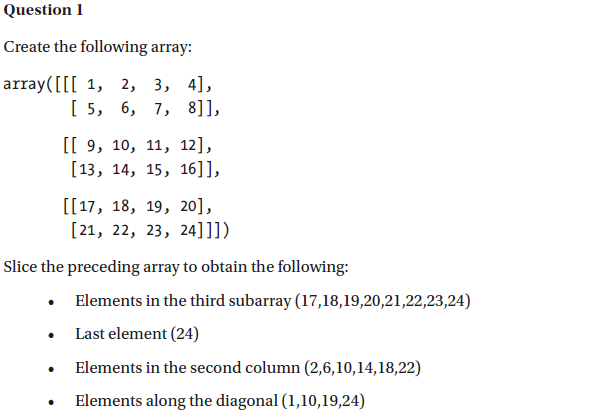

In [2]:
#1
import numpy as np
arr=np.arange(1,25).reshape(3,2,4)
arr[2]

array([[17, 18, 19, 20],
       [21, 22, 23, 24]])

In [5]:
#2
arr[2,1,3] #arr[-1,-1,-1] #arr[-1,1,-1]

24

In [8]:
#3
arr[:,:,1]

array([[ 2,  6],
       [10, 14],
       [18, 22]])

In [11]:
#4
arr[0,0,0],arr[1,0,1],arr[2,0,2],arr[2,1,3]

(1, 10, 19, 24)

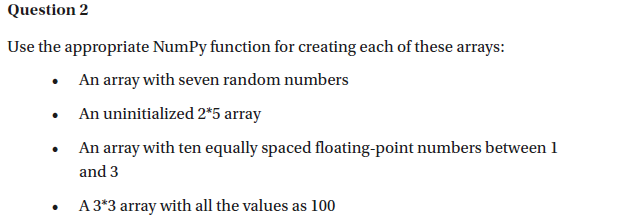

In [88]:
#2.1
#An array with seven random numbers
rarr=np.random.randn(7)
rarr

array([-0.45396022, -1.28437121,  1.14294029, -1.39558711,  1.4977336 ,
        0.01555088,  0.40791436])

In [94]:
#2.2
#an uninitialized 2*5 array
np.empty((2,5))

array([[20.25, 12.25,  6.25,  2.25,  0.25],
       [ 0.25,  2.25,  6.25, 12.25, 20.25]])

In [22]:
#2.3
#An array with ten equally spaced floating-point numbers between 1 and 3:
np.linspace(1,3,10)

array([1.        , 1.22222222, 1.44444444, 1.66666667, 1.88888889,
       2.11111111, 2.33333333, 2.55555556, 2.77777778, 3.        ])

In [ ]:
#2.4 
#A 3*3 array with all the values as 100:

In [23]:
np.full((3,3),100)

array([[100, 100, 100],
       [100, 100, 100],
       [100, 100, 100]])

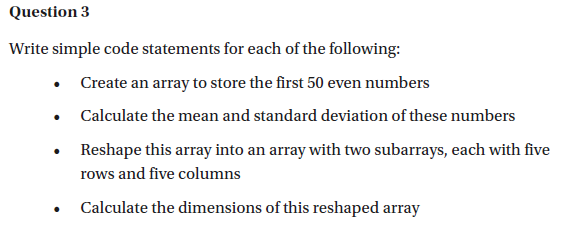

In [30]:
#3.1
#creating the array of first 50 even numbers
even_arr=np.arange(2,101,2)
even_arr

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [31]:
#3.2 
#Calculate the mean and standard deviation of these numbers
even_arr.mean(),even_arr.std()


(51.0, 28.861739379323623)

In [32]:
#3.3 
#Reshape this array into an array with two subarrays, each with five rows and five columns
even_arr.reshape(2,5,5)

array([[[  2,   4,   6,   8,  10],
        [ 12,  14,  16,  18,  20],
        [ 22,  24,  26,  28,  30],
        [ 32,  34,  36,  38,  40],
        [ 42,  44,  46,  48,  50]],

       [[ 52,  54,  56,  58,  60],
        [ 62,  64,  66,  68,  70],
        [ 72,  74,  76,  78,  80],
        [ 82,  84,  86,  88,  90],
        [ 92,  94,  96,  98, 100]]])

In [33]:
# 3.4
#Calculate the dimensions of this reshaped array
even_arr.reshape(2,5,5).ndim

3

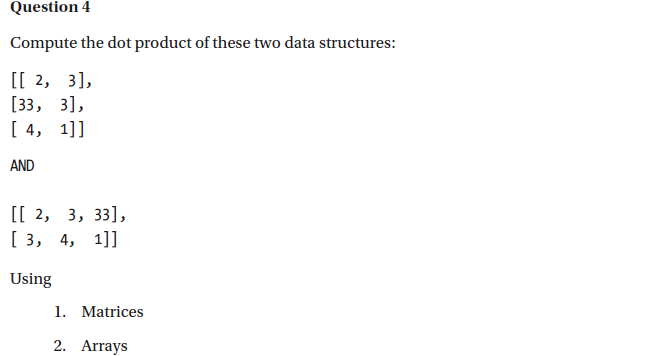

In [34]:
#4.1
#Computing the dot product using matrices requires the use of the * arithmetic operator
x=np.matrix([[2,3],[33,3],[4,1]])
y=np.matrix([[2,3,33],[3,4,1]])
x*y

matrix([[  13,   18,   69],
        [  75,  111, 1092],
        [  11,   16,  133]])

In [37]:
#4.2
#Computing the dot product using arrays requires the use of the dot method.
x=np.array([[2,3],[33,3],[4,1]])
y=np.array([[2,3,33],[3,4,1]])
x.dot(y)  #x@y


array([[  13,   18,   69],
       [  75,  111, 1092],
       [  11,   16,  133]])

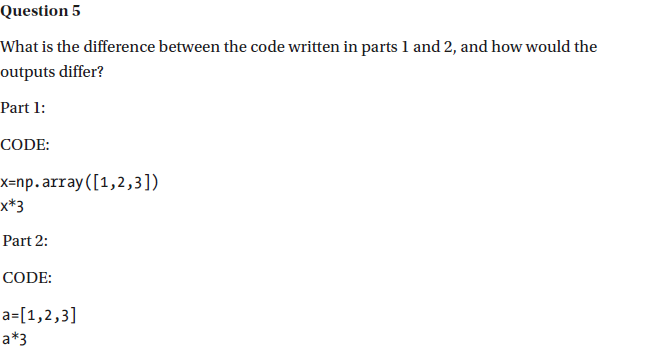

In [38]:
#5.1
#An array supports vectorization, and thus the * operator is applied to each element.
x=np.array([1,2,3])
x*3

array([3, 6, 9])

In [40]:
# For a list, vectorization is not supported, and applying the * operator simply repeats the list
# instead of multiplying the elements by a given number. A “for” loop is required to apply an
# arithmetic operator on each item.
a=[1,2,3]
a*3

[1, 2, 3, 1, 2, 3, 1, 2, 3]

In [42]:
import pandas as pd
import numpy as np
data = {'Item1' : pd.DataFrame(np.random.randn(4, 3)),
'Item2' : pd.DataFrame(np.random.randn(4, 2))}
p = pd.Panel(data)
print(p)

AttributeError: module 'pandas' has no attribute 'Panel'